In [1]:
from __future__ import division
import idx2numpy
#images are handwritten numbers from 0 to 9  taken from postal cards and labels provide that they are what from 0 to 9
#files encoded in binary format

# Question a

In [5]:
#reading data from file
def readFile(filename):
    data = idx2numpy.convert_from_file(filename)
    #print(data[0])
    return data


In [6]:
#flattening data
def flattenData(data):
    #print(len(data))
    flatten_data=data[0].flatten()
    for i in range(1,len(data)):
        temp=data[i].flatten()
        flatten_data=np.row_stack((flatten_data,temp)) 
        print(flatten_data.shape)
    return flatten_data

In [ ]:
import idx2numpy
import numpy as np
data_train=readFile('train-images-idx3-ubyte')#reading training data
data_train=flattenData(data_train)#flattening training data

In [7]:
import numpy as np
import pandas as pd
#np.save('data_train',data_train)
data_train=np.load('data_train.npy')
#data_train=np.multiply(1/255,data_train)
print("Training data shape:",data_train.shape)
# print(data[0])
# print(data[1])

Training data shape: (60000, 784)


In [299]:
#mean calculation
def meanData(data):
    #print(type(data))
    means=np.round(np.mean(data,axis=0),decimals=4)
    return means

In [300]:
#covariance calculation
def covarianceData(data):
    covariances=np.round(np.cov(data),decimals=4)
    return covariances

In [301]:
np.set_printoptions(suppress=True)

In [302]:
#printing Global mean and variances
global_mean_train=meanData(data_train)
print("Means Shape:",global_mean_train.shape)
print("Means:",global_mean_train)
global_covariances_train=covarianceData(data_train.T)#transpose has to be send else 60000 dimensions would be considered
print("Covariance shape:",global_covariances_train.shape)
# print("Covaraiance:",covariances[70])

Means Shape: (784,)
Means: [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.0001 0.0002 0.0003 0.0005 0.0006
 0.0007 0.0007 0.0007 0.0007 0.0007 0.0006 0.0004 0.0003 0.0002 0.0001
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.0002 0.0005 0.001  0.002  0.0034 0.0051 0.0073 0.0099
 0.0126 0.0142 0.0146 0.0133 0.011  0.008  0.0047 0.0025 0.0012 0.0004
 0.0001 0.     0.     0.     0.     0.     0.     0.     0.     0.0003
 0.0008 0.0021 0.0045 0.0087 0.0143 0.0213 0.029  0.038  0.0466 0.0519
 0.0515 0.0463 0.0374 0.0269 0.0164 0.0089 0.0042 0.0016 0.0006 0.0001
 0.     0.     0.     0.     0.     0.0001 0.0003 0.0016 0.0041 0.0095
 0.0187 0.0329 0.0522 0.0764 0.106  0.1381 0.1641 0.1775 0.1739 0.1535
 0.1229 0.0899 0.0582 0.034  0.0178 0.0084 0.0034 0.0008 0.0001 0.

# Question b(PCA)

In [303]:
#PDA calculation
def pdaFunc(data,dimension):
    means=meanData(data)
    #print(means)
    centralized_data=data-means
    print(centralized_data.shape)
    #print(meanData(centralized_data))
    covariance_matrix=np.cov(centralized_data.T)
    #print(covariance_matrix.shape)
    eigen_values,eigen_vectors = np.linalg.eigh(covariance_matrix)
    eigen_values=np.round(eigen_values,decimals=4)
    #eigen_vectors=eigen_vectors.T
    #print(eigen_values)
    #print(eigen_values.shape)
    sorted_eigen_values=eigen_values.argsort()[::-1]
    #print(sorted_eigen_values)
#     print(eigen_values.shape)
#     sorted_eigen_values=np.argsort(eigen_values)
    eigen_values =eigen_values[sorted_eigen_values]
    #print(eigen_values)
    eigen_vectors=eigen_vectors[:,sorted_eigen_values]
    #eigen_vectors=eigen_vectors.T
    #print(eigen_vectors.shape)
    projected_vector=eigen_vectors[:,:dimension]
    print(projected_vector.shape)
    projected_data=eigen_vectors[:,:dimension].T.dot(centralized_data.T)
#     print(projected_data.shape)
#     print(projected_data[:,0:1])
    return projected_data,eigen_vectors,eigen_values

In [304]:
from numpy.linalg import eig
projected_data_pda,eigen_vectors_pda,eigen_values_pda=pdaFunc(data_train,2)#60000*784
print("PCA Projected shape:",projected_data_pda.shape) #2 dimension 60000 data points
#print(eigen_values_pda)

(60000, 784)
(784, 2)
PCA Projected shape: (2, 60000)


# Question b(FDA)

In [305]:
#FDA calculation
def fdaFunc(data,class_covariance,class_mean,data_per_class,classes,dimension):
    
    #calculating global mean
    global_mean=meanData(data)
    #print(global_mean.shape)
    
    #between each class covariance (SB)
    sb=np.zeros((len(data[0]),len(data[0])))
#     print(sb.shape)
#     print("meam:",class_mean[0].shape)
#     print("meam:",global_mean.shape)
#     print(np.subtract(class_mean[0]-global_mean).shape)
    for clas in classes:
        sb+=np.multiply(len(data_per_class[clas]),np.outer((class_mean[clas]-global_mean),(class_mean[clas]-global_mean)))
    #print(sb[90])
    
    #calculating within class covariance
    sw=np.zeros(sb.shape)
    #print(sw.shape)
    for clas in classes:
        sw+=class_covariance[clas]
    #print(sw[90])
    
    #calculating eigen vectors sw inverse * sb
    inverse_sw=np.linalg.pinv(sw)
    dot_product=np.dot(inverse_sw,sb)
    eigen_values,eigen_vectors = np.linalg.eigh(dot_product)
    eigen_values=np.round(eigen_values,decimals=4)
    #print(eigen_values)
    #eigen_vectors=eigen_vectors.T
    #print(eigen_values)
    #print(eigen_values.shape)
    sorted_eigen_values=eigen_values.argsort()[::-1]
#     print(eigen_values.shape)
#     sorted_eigen_values=np.argsort(eigen_values)
    eigen_values =eigen_values[sorted_eigen_values]
    #print(eigen_values)
    eigen_vectors=eigen_vectors[:,sorted_eigen_values]
    #print(eigen_vectors.shape)
    projected_vector=eigen_vectors[:,:dimension]
    #print(projected_vector.T.shape)
    centralized_data=data-global_mean
    #print(centralized_data_fda.shape)
    projected_data=eigen_vectors[:,:dimension].T.dot(centralized_data.T)
    #print(projected_data_fda.shape)
# #     print(projected_data[:,0:1])
    return projected_data,eigen_vectors,eigen_values

In [306]:
def covarianceHelper(data_per_class,classes,mean):
    cov={}
    print(data_per_class[0].shape)
    print(mean[0].shape)
    for clas in classes:
        
        centralized=data_per_class[clas]-mean[clas]
        #cov[clas]=np.multiply(.001,covarianceData(centralized.to_numpy().T))
        cov[clas]=covarianceData(centralized.to_numpy().T)
        #print(np.linalg.det(cov[clas]))
        #print(cov[clas][0])
    #print(cov[9][:,600:601])
    #print(type(cov[9]))
    return cov

In [307]:
def meanHelper(data_per_class,classes):
    mean={}
    for clas in classes:
        #print(len(group_of_classes[clas].columns)
        #print(type(data_per_class[clas].to_numpy()))
        mean[clas]=meanData(data_per_class[clas].to_numpy())
    #print(type(mean[8]))
    return mean

In [308]:
def priorProb(data_per_class,classes,length):
    prior={}
    for clas in classes:
        prior[clas]=round(len(data_per_class[clas])/length,4)
        #print(prior[clas])
    #print(type(mean[8]))
    #print(type(prior))
    return prior

In [309]:
def classification(dataset):#return class wise covariances and means and prior probability
    #print(dataset.shape)
    labels=readFile('train-labels-idx1-ubyte')
    #labels.shape
    data_with_lables= np.column_stack((dataset, labels))
    #print(data_labels[0])
    data_with_lables= pd.DataFrame(data=data_with_lables)#converting to dataframe
    #print(data_with_lables.shape)
    #print(data_with_lables.head())
    class_grouping= data_with_lables.groupby(data_with_lables.loc[:,len(data_with_lables.columns)-1]) #grouping based on class
    #print(group_classes.get_group(1) )
    classes = [clas for clas in class_grouping.groups.keys()]#getting distinct classes
    # print(classes)
    data_per_class={}
    for clas in classes:
        data_per_class[clas]=class_grouping.get_group(clas).iloc[:,:-1]
    # print(data_per_class[1])
    class_mean=meanHelper(data_per_class,classes)
    class_covariance=covarianceHelper(data_per_class,classes,class_mean)
    #print(class_covariance[9])
    class_prior=priorProb(data_per_class,classes,len(dataset))
    return class_covariance,class_mean,class_prior,data_per_class,classes

In [310]:
np.set_printoptions(suppress=True)

In [311]:
import pandas as pd
#print(data.shape)
class_covariance_train,class_mean_train,prior_train,data_per_class_train,classes_train=classification(data_train)#getting these from train
#print(len(data_per_class_fda[0]))
#print(class_mean_fda[0].shape)
projected_data_fda,eigen_vectors_fda,eigen_values_fda=fdaFunc(data_train,class_covariance_train,class_mean_train,data_per_class_train,classes_train,2)
print("FDA Projected Shape:",projected_data_fda.shape)
print(eigen_values_fda)


(5923, 784)
(784,)
FDA Projected Shape: (2, 60000)
[ 6456384.4447  1229083.8413   917870.2498   536457.8788   430834.9094
   385696.9581   219116.4953   189705.5935   158903.642    121489.8373
    91541.2728    87110.1313    73307.7339    58262.8819    51805.2311
    46408.0644    36809.7639    35124.5621    33289.5802    32413.112
    28522.2807    25938.2269    22733.7996    19959.1502    17527.0091
    17195.9962    15407.8116    14754.2013    14078.8721    12541.3393
    12053.3322    11020.349      9868.4688     9614.6458     9412.9465
     9073.7763     8677.483      8108.1378     7915.3134     7700.6203
     7368.3207     7057.9634     6994.2347     6334.6345     6196.156
     5769.6766     5463.4546     5075.8694     4825.1761     4736.696
     4452.469      4390.6326     4239.1751     4054.2985     3867.2645
     3780.1664     3648.7484     3429.275      3165.8708     3027.8713
     2994.6123     2891.0824     2825.2078     2750.8373     2591.8004
     2541.1965     2371.8963 

# Question c(PCA)

/Library/Python/3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


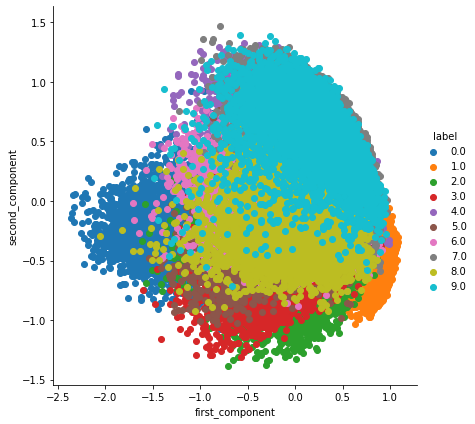

In [202]:
#PCA projection plot
import matplotlib.pyplot as plt 
import seaborn as sn
labels=readFile('train-labels-idx1-ubyte')
projected_data_pda_labels= np.vstack((projected_data_pda, labels)).T
#print(type(projected_data_pda_labels))
dataframe = pd.DataFrame(data=projected_data_pda_labels, columns=('first_component','second_component', 'label'))
sn.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, 'first_component', 'second_component').add_legend()
plt.show()

# Question c(FDA)

In [203]:
#FDA projection
import seaborn as sn
labels=readFile('train-labels-idx1-ubyte')
projected_data_fda_labels= np.vstack((projected_data_fda, labels)).T
print(projected_data_pda_labels.shape)
dataframe=pd.DataFrame(data=projected_data_fda_labels, columns=('first_component','second_component', 'label'))
sn.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, 'first_component', 'second_component').add_legend()
plt.show()

(60000, 3)


# Question d

In [204]:
#LDA implementation
def ldaFunc(data,class_cov,class_mean,classes,prior):
    max_=-sys.maxsize - 1
    data_class=-1
#     print(class_cov[9].shape) #2*2
#     print(class_mean[9].shape)#2
    for clas in classes:
        #print(np.linalg.det(class_cov[clas]))
        #print(class_cov[clas])
        if(class_cov[clas].ndim==0):
            temp1=-math.log(class_cov[clas],2)*(1/2)
            inverse=class_cov[clas]
        else:
            temp1=-math.log(np.linalg.det(class_cov[clas]),2)*(1/2)
            inverse=np.linalg.inv(class_cov[clas])
        #print("final:",temp1)
        temp2=np.subtract(data,class_mean[clas])
        temp3=np.dot(np.dot(temp2.T,inverse),temp2)
        temp3=-temp3*(1/2)
        priors=math.log(prior[clas],2)
        final=np.round(temp1+temp3+priors,4)
        
        if(max_<final):
            max_=final
            data_class=clas
    return data_class
    #print(data.shape)
    #print(temp)

# Question e

In [205]:
# def chooseP(energy,eigen_values,eigen_vectors):# calculating number of components based on eigen energy
#     #print(type(eigen_values_pda_test))
#     sum_=round(np.sum(eigen_values),4)*energy
#     #print(sum_)
#     sum_temp=0
#     i=0
#     while(sum_temp<sum_):
#         sum_temp+=eigen_values[i]
#         #print("hell",sum_temp)
#         i+=1
# #     print(sum_temp)
# #     print(sum_)
#     return i

In [206]:
def chooseP(energy,eigen_values,eigen_vectors):
    tot = sum(eigen_values)
    i=0
    var_exp=(eigen_values[i]/tot)*100
    #print(var_exp)
    #var_exp = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
    while(var_exp<energy):
        i+=1
        var_exp+=(eigen_values[i]/tot)*100
    return i+2
    #cum_var_exp = np.cumsum(var_exp)
#     print ("Variance captured by each component is",var_exp)
#     print(40 * '-')
#     print ("Cumulative variance captured as we travel each component",cum_var_exp)

In [207]:
def accuracy(predicted_classes,label_test):
    return (np.sum(predicted_classes == label_test))/(len(predicted_classes))

In [208]:
def eigenEnergy(energy,data,test_data):# eigen energy wise predicting classes
    projected_train,eigen_vectors_train,eigen_values_train=pdaFunc(data,len(data[0]))
    p=chooseP(energy,eigen_values_train,eigen_vectors_train)
    print("Dimension:",p)
    # print(data[0])
    projected_train,eigen_vectors_train,eigen_values_train=pdaFunc(data,p)#projecting against p dimension
    #print(projected_data_pda_train.shape)

    class_covariance_projected,class_mean_projected,prior_projected,data_per_class_projected,classes_projected=classification(projected_train.T)#getting these from train projected data
    #print(class_mean[0].shape)
    #print(type(test_data))
    global_mean_test=meanData(test_data)
    #print(global_mean_test.shape)
    centralized_test=test_data-global_mean_test
    #print(centralized_test.T.shape)
    #print(eigen_vectors_pda_train[:,:p].T.shape)
    projected_test=eigen_vectors_train[:,:p].T.dot(centralized_test.T)#projecting cetralized test data on train eigen vectors
    #print(projected_data_pda_test.shape)
    
    predicted_classes=[]
    for d in projected_test.T:
        predicted_classes.append(ldaFunc(d,class_covariance_projected,class_mean_projected,classes_projected,prior_projected))
        
    #print(predicted_classes)
    return predicted_classes,eigen_vectors_train,p
#     d=projected_data_pda_test[:,0]
# #     print("data:",d)
# #     print("dshap",d.shape)
# #     print("mshap",class_mean[0].shape)
#     #print(type(data.T))
    
#     predicted_classes.append(ldaFunc(d,class_covariance,class_mean,classes,prior))
#     print(predicted_classes)   

In [ ]:
data_test=readFile('t10k-images-idx3-ubyte')
data_test=flattenData(data_test)
print(data_test.shape)

In [54]:
import numpy as np
import pandas as pd
import sys
import math
#np.save('data_test',data_test)
data_test=np.load('data_test.npy')
#print(test_data.shape)
predicted_classes,eigen_vectors_95,p=eigenEnergy(95,data_train,data_test)

(60000, 784)
(784, 784)
Dimension: 155
(60000, 784)
(784, 155)


In [94]:
total = sum(eigen_values_pda)
print(total)
var_exp_temp = [(i / total)*100 for i in sorted(eigen_values_pda, reverse=True)]
cum_var_exp_temp = np.cumsum(var_exp_temp)
print ("Variance by each component:",var_exp_temp)
print(40 * '-')
print ("Cumulative variance as we go each component",cum_var_exp_temp)

3428502.5747802015
Variance by each component: [9.704664359713918, 7.095924059094473, 6.169088762368138, 5.38941948655337, 4.868797023474824, 4.312231315293761, 3.2719299538217324, 2.883895446204408, 2.7620293987707045, 2.3570005496386823, 2.1091896150669935, 2.022991081787332, 1.715818199530835, 1.6921114320712631, 1.5786412805087295, 1.482952613221263, 1.324560950904166, 1.2768973677779787, 1.187262939594271, 1.1526837013508433, 1.066166207085376, 1.0067133719744152, 0.9535733268460574, 0.9125437456775588, 0.8834046916650166, 0.8393191407241093, 0.8125788094691216, 0.7863660841332544, 0.7447331023113468, 0.6908591276577839, 0.6580937726120347, 0.648147869951913, 0.602615030154396, 0.5865821878582357, 0.5700214743363543, 0.5436277707700884, 0.5057864163712741, 0.4878586036040035, 0.4814293416583271, 0.47226632629403253, 0.456746920881792, 0.4448360117439572, 0.41850132914578114, 0.39821533869406944, 0.38497460735020383, 0.3751033869561873, 0.3620088516662267, 0.3515912768291211, 0.340

In [312]:
total = sum(eigen_values_fda)
print(total)
print(eigen_values_fda)
var_exp_temp = [(i/ total)*100 for i in sorted(eigen_values_fda, reverse=True)]
cum_var_exp_temp = np.cumsum(var_exp_temp)
print ("Variance by each component:",var_exp_temp)
print(40 * '-')
print ("Cumulative variance as we go each component",cum_var_exp_temp)

95144.940000006
[ 6456384.4447  1229083.8413   917870.2498   536457.8788   430834.9094
   385696.9581   219116.4953   189705.5935   158903.642    121489.8373
    91541.2728    87110.1313    73307.7339    58262.8819    51805.2311
    46408.0644    36809.7639    35124.5621    33289.5802    32413.112
    28522.2807    25938.2269    22733.7996    19959.1502    17527.0091
    17195.9962    15407.8116    14754.2013    14078.8721    12541.3393
    12053.3322    11020.349      9868.4688     9614.6458     9412.9465
     9073.7763     8677.483      8108.1378     7915.3134     7700.6203
     7368.3207     7057.9634     6994.2347     6334.6345     6196.156
     5769.6766     5463.4546     5075.8694     4825.1761     4736.696
     4452.469      4390.6326     4239.1751     4054.2985     3867.2645
     3780.1664     3648.7484     3429.275      3165.8708     3027.8713
     2994.6123     2891.0824     2825.2078     2750.8373     2591.8004
     2541.1965     2371.8963     2277.9516     2243.31       206

In [265]:
np.save('predicted_class_95',predicted_classes)
predicted_classes=np.load('predicted_class_95.npy')
label_test=readFile('t10k-labels-idx1-ubyte')
print("Length of predicted class:",len(predicted_classes))
accu=accuracy(predicted_classes,label_test)
print("Accuracy:",accu)

Length of predicted class: 10000
Accuracy: 0.9056


# Question f

In [55]:
from skimage.io import imsave
import matplotlib.pyplot as plt
#eigen_vectors_pda_train=eigen_vectors_pda_train(:,:153)
print(eigen_vectors_95.shape)
results_dir = './Output_Q1_e/'
for i in range(p):
    y=(eigen_vectors_95[:,10].reshape(28,28))
    plt.imshow(y[:,:], cmap='gray')
    plt.savefig('./Output_Q1_e/plot'+str(i)+'.png', dpi=300, bbox_inches='tight')
    #plt.show()
#plt.imsave(results_dir)

(784, 784)


# Question g

In [64]:
def helper(energylevel):
    predicted_classes,eigen_vectors_train,p=eigenEnergy(energylevel,data_train,data_test)
    label_test=readFile('t10k-labels-idx1-ubyte')
    accu=accuracy(predicted_classes,label_test)
    print("Eneregy Level:",energylevel)
    print("Dimension:",p)
    print("Accuray:",accu)

In [67]:
helper(70)
helper(90)
helper(99)

(60000, 784)
(784, 784)
Dimension: 27
(60000, 784)
(784, 27)
Eneregy Level: 70
Dimension: 27
Accuray: 0.9384
(60000, 784)
(784, 784)
Dimension: 88
(60000, 784)
(784, 88)
Eneregy Level: 90
Dimension: 88
Accuray: 0.9259
(60000, 784)
(784, 784)
Dimension: 332
(60000, 784)
(784, 332)
Eneregy Level: 99
Dimension: 332
Accuray: 0.6586


# Question h

In [281]:
def eigenEnergyFDA(energy,data,test_data):
    class_covariance,class_mean,prior,data_per_class,classes=classification(data)
    print(class_covariance[0].shape)
    projected_data_train,eigen_vectors_train,eigen_values_train=fdaFunc(data,class_covariance,class_mean,data_per_class,classes,len(data[0]))
    print(eigen_values_train.shape)
    p=chooseP(energy,eigen_values_train,eigen_vectors_train)
    print("Dimension:",p)
    # print(data[0])
    projected_data_train,eigen_vectors_train,eigen_values_train=fdaFunc(data,class_covariance,class_mean,data_per_class,classes,p)#projecting against p dimension
    print(projected_data_train.T.shape)

    class_covariance,class_mean,prior,data_per_class,classes=classification(projected_data_train.T)#getting these from train
    print(class_covariance[1].ndim)
    print(test_data.shape)
    global_mean_test=meanData(test_data)
    print(global_mean_test.shape)
    
    
    centralized_test=test_data-global_mean_test
    print(centralized_test.T.shape)
    
    print(eigen_vectors_train[:,:p].T.shape)
    projected_data_test=eigen_vectors_train[:,:p].T.dot(centralized_test.T)
    print(projected_data_test.shape)
    
    classes=[clas for clas in data_per_class.keys()]
    #print(classes)
    predicted_classes=[]
    for d in projected_data_test.T:
        #print(d)
        predicted_classes.append(ldaFunc(d,class_covariance,class_mean,classes,prior))
        
    #print(len(predicted_classes))
    return predicted_classes,eigen_vectors_train,p
#     #d=projected_data_pda_test[:,0]
# #     print("data:",d)
# #     print("dshap",d.shape)
# #     print("mshap",class_mean[0].shape)
#     #print(type(data.T))
    
# #     predicted_classes.append(ldaFunc(d,class_covariance,class_mean,classes,prior))
# #     print(predicted_classes)   

In [314]:
import numpy as np
import pandas as pd
import sys
import math
#test_data=flattenData(test_data)
#np.save('data_test',test_data)
#print(test_data.shape)
predicted_classes_fda,eigen_vectors_train_fda,p=eigenEnergyFDA(95,data_train,data_test)
#print(len(predicted_classes_fda))
label_test=readFile('t10k-labels-idx1-ubyte')
print(len(predicted_classes_fda))
accu=accuracy(predicted_classes_fda,label_test)
print("Energy Level 99%")
print("Dimension:",p)
print("Accuracy:",accu)

(5923, 784)
(784,)
(784, 784)
(784,)
Dimension: 2
(60000, 2)
(5923, 2)
(2,)
2
(10000, 784)
(784,)
(784, 10000)
(2, 784)
(2, 10000)
10000
Energy Level 99%
Dimension: 2
Accuracy: 0.4332


# Question i

In [102]:
#applying pcs to fda to lda
def pca_fda_lda(data,test_data,energy):
    
    global_mean_test=meanData(test_data)
    #print(global_mean_test.shape)
    centralized_test=test_data-global_mean_test
    
    #applying PCA
    projected_pca,eigen_vectors_pca,eigen_values_pca=pdaFunc(data,len(data[0]))
    p=chooseP(energy,eigen_values_pca,eigen_vectors_pca)
    print("Dimension as per PCA:",p)
    # print(data[0])
    projected_pca,eigen_vectors_pca,eigen_values_pca=pdaFunc(data,p)#projecting against p dimension
    #print(projected_pca.shape)
    
    projected_test_pca=eigen_vectors_pca[:,:p].T.dot(centralized_test.T)#projecting cetralized test data on train eigen vectors
    #print(projected_test_pca.shape)
    print("Dimension of test data after PCA:",projected_test_pca.shape)
    
    
    #applying fda
    class_covariance_fda,class_mean_fda,prior_fda,data_per_class_fda,classes_fda=classification(projected_pca.T)#getting these from train projected data
    projected_fda,eigen_vectors_fda,eigen_values_fda=fdaFunc(projected_pca.T,class_covariance_fda,class_mean_fda,data_per_class_fda,classes_fda,len(data[0]))
    #print(eigen_vectors_fda.shape)
    p=chooseP(energy,eigen_values_fda,eigen_vectors_fda)
    print("Dimension as per FDA:",p)
    projected_fda,eigen_vectors_fda,eigen_values_fda=pdaFunc(projected_pca.T,p)#projecting against p dimension
    #print(eigen_vectors_fda.shape)
    class_covariance_fda,class_mean_fda,prior_fda,data_per_class_fda,classes_fda=classification(projected_fda.T)
    

#     #print(class_mean[0].shape)
#     #print(type(test_data))
    global_mean_test_pca=meanData(projected_test_pca)
    #print(global_mean_test.shape)
    centralized_test_fda=projected_test_pca-global_mean_test_pca
    #print(centralized_test_fda.T.shape)
# #     #print(eigen_vectors_pda_train[:,:p].T.shape)
    projected_test_fda=eigen_vectors_fda[:,:p].T.dot(centralized_test_fda)#projecting cetralized test data on train eigen vectors
    #print(projected_test_fda.shape)
    print("Dimension of test data after PCA:",projected_test_fda.shape)
    
    predicted_classes=[]
    for d in projected_test_fda.T:
        predicted_classes.append(ldaFunc(d,class_covariance_fda,class_mean_fda,classes_fda,prior_fda))
        
    #print(len(predicted_classes))
    return predicted_classes,p

In [315]:
label_test=readFile('t10k-labels-idx1-ubyte')
predicted_classes_pca_lda_fda,p=pca_fda_lda(data_train,data_test,99)
accu=accuracy(predicted_classes_pca_lda_fda,label_test)
print("Energy Level 95%")
print("Dimension:",p)
print("Accuracy:",accu)

(60000, 784)
(784, 784)
Dimension as per PCA: 332
(60000, 784)
(784, 332)
Dimension of test data after PCA: (332, 10000)
(5923, 332)
(332,)
Dimension as per FDA: 3
(60000, 332)
(332, 3)
(5923, 3)
(3,)
Dimension of test data after PCA: (3, 10000)
Energy Level 95%
Dimension: 3
Accuracy: 0.4972


# Question 2

# Question a

In [3]:
#generating noisy data
import numpy as np
non_noise=np.load('data_train.npy')
mean=0
sigma=10
print("Means=",mean," Sigma:",sigma)
noise = np.random.normal(mean, sigma, [60000,784]) 
print("Noise shape:",noise.shape)
signal=noise+non_noise
print("Signal Shape:",signal.shape)


Means= 0  Sigma: 10
Noise shape: (60000, 784)
Signal Shape: (60000, 784)


# Question b and d

In [4]:
#np.save('signal',signal)
#signal=np.load('signal.npy')
print(signal.shape)
projected_data_signal,eigen_vectors_signal,eigen_values_signal=pdaFunc(signal,len(signal[0]))
print(projected_data_signal.shape)
p=chooseP(95,eigen_values_signal,eigen_vectors_signal)
print("Dimension of the noisy data at 95% eigen energy:",p)

projected_data_signal,eigen_vectors_signal,eigen_values_signal=pdaFunc(signal,p)
print("Projected Signal Data shape:",projected_data_signal.shape)

(60000, 784)


NameError: name 'pdaFunc' is not defined

# Question c

In [318]:
#PCA reconstuction
print(eigen_vectors_signal.shape)
projected_eigen_vector=eigen_vectors_signal[:,:p]
print(projected_eigen_vector.shape)
inverse_projected_eigen_vector=np.linalg.inv(projected_eigen_vector.dot(projected_eigen_vector.T))
print(inverse_projected_eigen_vector.shape)
recontructed_data=(inverse_projected_eigen_vector.dot(projected_eigen_vector)).dot(projected_data_signal).T
print(recontructed_data.shape)

(784, 784)
(784, 155)
(784, 784)
(60000, 784)


(60000, 784)


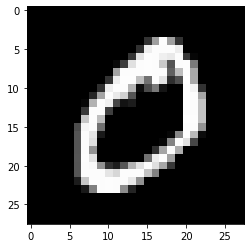

In [319]:
#Before addition of noise
from skimage.io import imsave
#eigen_vectors_pda_train=eigen_vectors_pda_train(:,:153)
#print(eigen_vectors_pda_train[:,:153].shape)
print(data_train.shape)
y=(data_train[1,:].reshape(28,28))
import matplotlib.pyplot as plt
plt.imshow(y[:,:], cmap='gray')
plt.show()

(60000, 784)


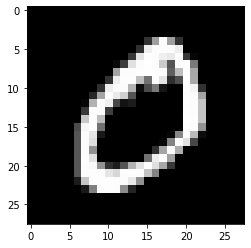

In [320]:
#After addition of noise
from skimage.io import imsave
#eigen_vectors_pda_train=eigen_vectors_pda_train(:,:153)
#print(eigen_vectors_pda_train[:,:153].shape)
print(data_train.shape)
y=(signal[1,:].reshape(28,28))
import matplotlib.pyplot as plt
plt.imshow(y[:,:], cmap='gray')
plt.show()

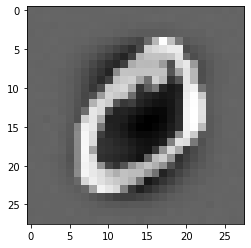

In [294]:
#after addition of noise
from skimage.io import imsave
#reconstructed_temp=recontructed_data
#eigen_vectors_pda_train=eigen_vectors_pda_train(:,:153)
#print(eigen_vectors_pda_train[:,:153].shape)
z=(reconstructed_temp[1,:].reshape(28,28))
import matplotlib.pyplot as plt
plt.imshow(z[:,:], cmap='gray')
plt.show()

In [ ]:
#after addition of noise
from skimage.io import imsave
#eigen_vectors_pda_train=eigen_vectors_pda_train(:,:153)
#print(eigen_vectors_pda_train[:,:153].shape)
z=(recontructed_data[1,:].reshape(28,28))
import matplotlib.pyplot as plt
plt.imshow(z[:,:], cmap='gray')
plt.show()

In [ ]:
tot = sum(eigen_values_pda)
var_exp = [(i / tot)*100 for i in sorted(eigen_values_pda, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component",cum_var_exp)